In [104]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

data_root = Path("./results")
hflop_root = data_root / "hflop_10"
hier_root = data_root / "hier_10"
flat_root = data_root / "non_hier_10"

assert hflop_root.is_dir() and hier_root.is_dir() and flat_root.is_dir()

In [105]:
calcs_hflop = pd.read_csv(hflop_root / "calculations.txt", header=None)
latencies_hflop = pd.read_csv(hflop_root / "latencies.txt", header=None)
calcs_hflop = calcs_hflop * 10
speedups = np.linspace(0, 95, 21)
df_hflop = pd.DataFrame([(s, val[0]) for s in speedups for val in calcs_hflop.to_numpy()], columns=['speedup', 'value'])

latencies_rep = np.tile(latencies_hflop.values.reshape(-1), len(speedups))
df_hflop["e2e"] = df_hflop["value"] + latencies_rep 
print(len(df_hflop))

42000


In [106]:
speedups = np.linspace(0, 95, 21)
print(speedups)

calcs_hier = pd.read_csv(hier_root / "calculations.txt", header=None)
latencies_hier = pd.read_csv(hier_root / "latencies.txt", header=None)
calcs_hier = calcs_hier * 10
# gp1 clients have speed ups
latencies_gp1 = latencies_hier[latencies_hier[0] > 0.01]
calcs_gp1 = calcs_hier.loc[latencies_gp1.index]
latencies_gp2 = latencies_hier[latencies_hier[0] <= 0.01]
calcs_gp2 = calcs_hier.loc[latencies_gp2.index]

# apply speedup for the two client
df_hier_gp1 = pd.DataFrame([(s, val[0] * (1 - (s / 100.))) for s in speedups for val in calcs_gp1.to_numpy()], columns=['speedup', 'value'])

# "static" 0 speedup for other clients
df_hier_gp2 = pd.DataFrame([(s, val[0]) for s in speedups for val in calcs_gp2.to_numpy()], columns=['speedup', 'value'])

latencies_gp1_rep = np.tile(latencies_gp1.values.reshape(-1), len(speedups))
latencies_gp2_rep = np.tile(latencies_gp2.values.reshape(-1), len(speedups))

df_hier_gp1["e2e"] = df_hier_gp1["value"] + latencies_gp1_rep
df_hier_gp2["e2e"] = df_hier_gp2["value"] + latencies_gp2_rep
# 

df_hier = pd.concat([df_hier_gp1, df_hier_gp2])

[ 0.    4.75  9.5  14.25 19.   23.75 28.5  33.25 38.   42.75 47.5  52.25
 57.   61.75 66.5  71.25 76.   80.75 85.5  90.25 95.  ]


In [107]:
len(calcs_gp1)

200

In [108]:
assert all(df_hier_gp2["value"].to_numpy()[1800:3600] == df_hier_gp2["value"].to_numpy()[0:1800])

In [109]:
df_hier_gp1[2000:]

,speedup,value,e2e
2000,47.5,0.228608,0.285911
2001,47.5,0.317075,0.374379
2002,47.5,0.126678,0.195803
2003,47.5,0.131475,0.200600
2004,47.5,0.154155,0.223280
...,...,...,...
4195,95.0,0.029323,0.086627
4196,95.0,0.014666,0.083791
4197,95.0,0.019694,0.076998
4198,95.0,0.024596,0.093721


In [110]:
print(df_hier[df_hier["speedup"] == 0.0]["e2e"].mean())
print(df_hier[df_hier["speedup"] > 0.0]["e2e"].mean())

0.32162512878638494
0.2986592126609086


In [111]:
print(calcs_gp2[0].mean())
print(calcs_gp1[0].mean())

0.29254035817252216
0.46046949625015215


In [112]:
calcs_flat = pd.read_csv(flat_root / "calculations.txt", header=None)
latencies = pd.read_csv(flat_root / "latencies.txt", header=None)
calcs_flat = calcs_flat * 10

# reduce not incrase time 
df_flat = pd.DataFrame([(s, val[0] * (1 - (s / 100.))) for s in speedups for val in calcs_flat.to_numpy()], columns=['speedup', 'value'])

assert len(df_flat) == len(speedups) * len(calcs_flat)
assert len(df_flat) == len(df_hier)

latencies_rep = np.tile(latencies.values.reshape(-1), len(speedups))
assert all(latencies_rep[2000:4000] == latencies_rep[0:2000])
df_flat["e2e"] = df_flat["value"] + latencies_rep 
print(df_flat)

       speedup     value       e2e
0          0.0  0.702372  0.785330
1          0.0  0.454869  0.513721
2          0.0  0.000007  0.089212
3          0.0  0.391345  0.445427
4          0.0  0.399666  0.450353
...        ...       ...       ...
41995     95.0  0.014022  0.096981
41996     95.0  0.017044  0.108867
41997     95.0  0.019828  0.073910
41998     95.0  0.005147  0.059312
41999     95.0  0.013765  0.068712

[42000 rows x 3 columns]


In [113]:
df_flat[4000:]

,speedup,value,e2e
4000,9.5,0.635646,0.718605
4001,9.5,0.411657,0.470509
4002,9.5,0.000006,0.089211
4003,9.5,0.354167,0.408249
4004,9.5,0.361698,0.412384
...,...,...,...
41995,95.0,0.014022,0.096981
41996,95.0,0.017044,0.108867
41997,95.0,0.019828,0.073910
41998,95.0,0.005147,0.059312


In [114]:
calcs_flat

,0
0,0.702372
1,0.454869
2,0.000007
3,0.391345
4,0.399666
...,...
1995,0.280435
1996,0.340872
1997,0.396566
1998,0.102935


       speedup     value       e2e        Method
0          0.0  0.435443  0.492746  Hierarchical
1          0.0  0.603952  0.661256  Hierarchical
2          0.0  0.241292  0.310417  Hierarchical
3          0.0  0.250428  0.319553  Hierarchical
4          0.0  0.293629  0.362754  Hierarchical
...        ...       ...       ...           ...
37795     95.0  0.256646  0.261515  Hierarchical
37796     95.0  0.068321  0.074958  Hierarchical
37797     95.0  0.346811  0.351404  Hierarchical
37798     95.0  0.358970  0.367631  Hierarchical
37799     95.0  0.063810  0.071310  Hierarchical

[42000 rows x 4 columns]
       speedup     value       e2e            Method
0          0.0  0.702372  0.785330  Non-Hierarchical
1          0.0  0.454869  0.513721  Non-Hierarchical
2          0.0  0.000007  0.089212  Non-Hierarchical
3          0.0  0.391345  0.445427  Non-Hierarchical
4          0.0  0.399666  0.450353  Non-Hierarchical
...        ...       ...       ...               ...
41995     95.0 

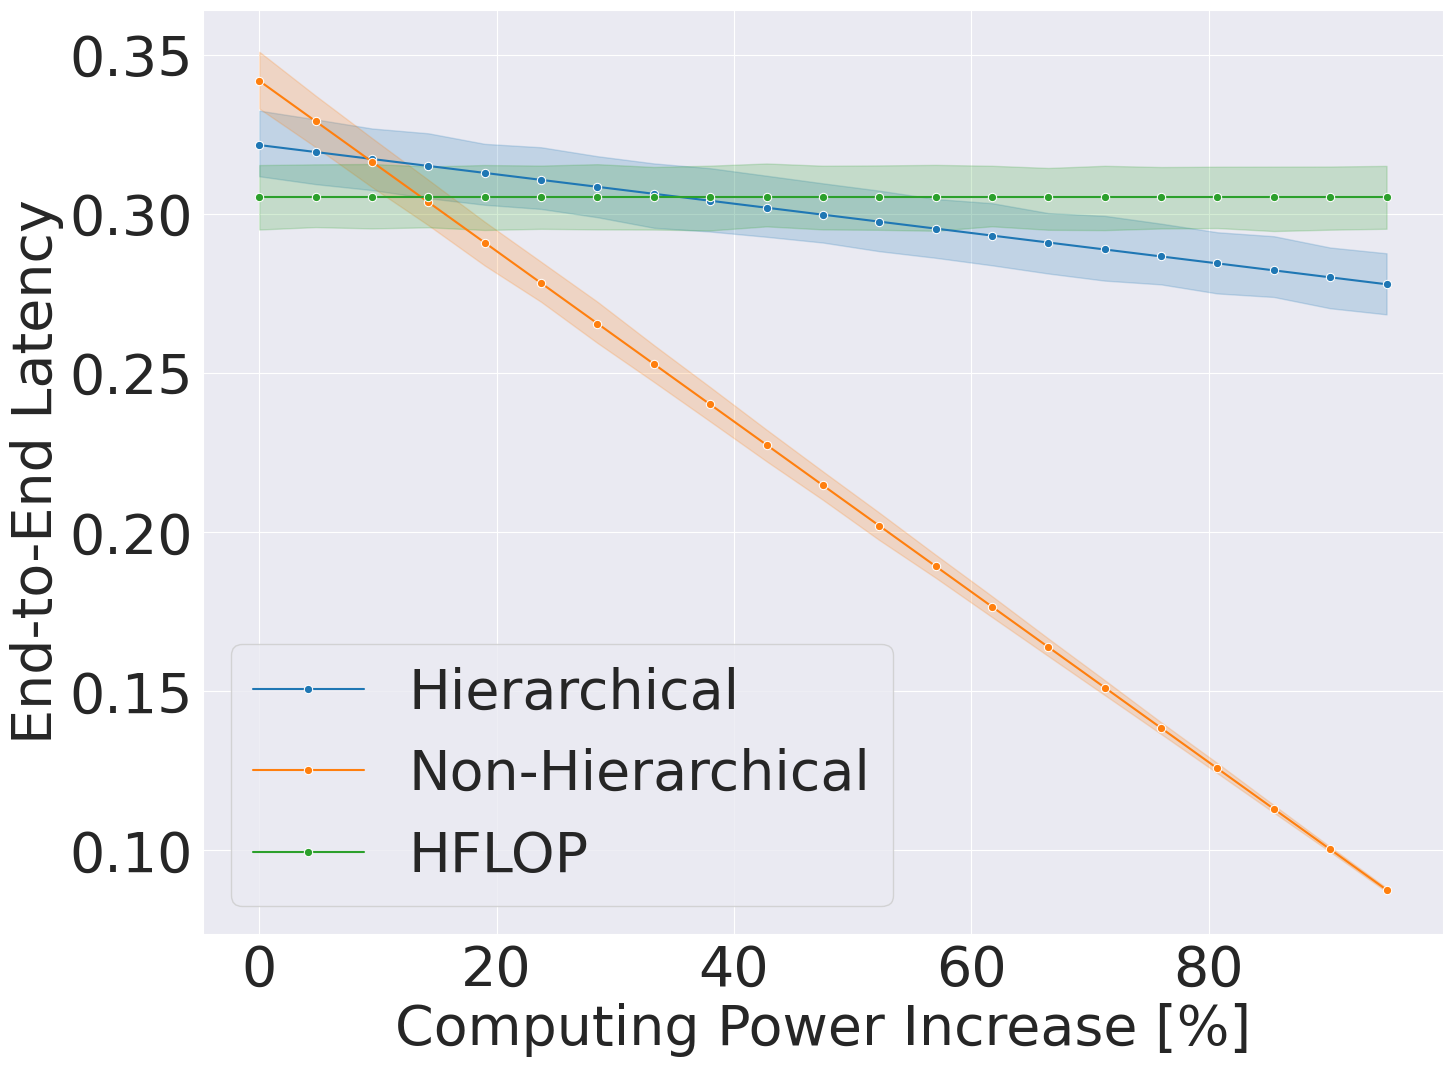

In [115]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

df_hier["Method"] = "Hierarchical"
df_flat["Method"] = "Non-Hierarchical"
df_hflop["Method"] = "HFLOP"

df_res =  pd.concat([df_hier, df_flat, df_hflop])
print(df_hier)
print(df_flat)
plt.figure(figsize=(16,12)) 
plot = sns.lineplot(x='speedup', y='e2e', hue='Method', data=df_res, errorbar='ci', marker='o')

# hflops_constant = df_hflop["e2e"].mean()
# plt.axhline(y=hflops_constant, color="r")

# Make a legend for the meaning of the line color.
# red_line = mlines.Line2D([], [], color='red', label='HFLOP')

# Get the current legend
leg = plot.legend_
plt.xticks(fontsize=40.0)
plt.yticks(fontsize=40.0)
# Manually update the legend
# leg.get_lines().append(red_line)
# leg.get_texts().append(plt.text(0, 0, 'HFLOP'))

# Update the legend with the custom legend
plot.legend(fontsize=40.0)#handles=leg.legendHandles + [red_line])
plt.title('')
# plot.xticks(rotation=90, size=30.0)
# plot.yticks(rotation=90, size=30.0)
plt.xlabel('Computing Power Increase [%]', size=40.0)
plt.ylabel('End-to-End Latency', size=40.0)
plt.savefig("speedups_10.png")
print("HER")
plt.show()